# Cognifyz Internship Program

# Restaurant Data Analysis

<b> Author :- RENUKA PARAB <b>

# Level 3 :

 <b>Task 1 :Predictive Modeling <b>

<ol>
    <li> Build a regression model to predict the aggregate rating of a restaurant based on available features.
Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.</li>
    <li>Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.</li>
</ol>


<b> Task2 :Customer Preference Analysis <b>

<ol>
    <li>Analyze the relationship between the type of cuisine and the restaurant's rating.</li>
    <li>Identify the most popular cuisines among customers based on the number of votes.</li>
    <li>Discovered specific cuisines that tend to receive higher ratings <?li>
</ol>
 


<b> Task3 :Data Visualization <b>

<ol>
    <li>Created visualizations representing rating distributions using various chart types.</li>
    <li>Compared average ratings across different cuisines and cities.</li>
    <li>Visualized the relationship between features and the target variable for deeper insights.</li>
</ol>

In [1]:
# importing the warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries which we are going to use for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ;sns.set(color_codes = True)

In [3]:
# load the dataset
df1 = pd.read_csv("new_Dataset .csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Level 3 - Task 1

<b> Task 1 : Predictive Modeling <b>

<b> 1.Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [6]:
df = pd.read_csv("new_Dataset .csv")

In [7]:
#convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [8]:
# select features and targets 
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [9]:
# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state=42)

In [10]:
# initialise and train the linear regrssion model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[ 1.38686965e-06  6.72786991e-04  6.54436449e-01 -2.40525652e-01
  6.51947553e-01]
1.2330394199256798


In [11]:
y_pred = regressor.predict(X_test)
MSE =np.sqrt( mean_squared_error(y_test, y_pred))
MAE =mean_absolute_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)
print("Model: Linear regression")
print("Mean Absolute error :",MAE)
print("Mean Squared error :", MSE)
print("r2 score :",r2)

Model: Linear regression
Mean Absolute error : 1.075071272136913
Mean Squared error : 1.2947896642710524
r2 score : 0.26344464090219477


<b> 2. Experiment with Different Algorithms <b>

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [14]:
# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)
    
    #Calculate Mean Absolute Error (MAE) to evaluate model accuracy
    mae =mean_absolute_error(y_test, y_pred)
    
    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6764802747031446
Mean Absolute Error: 1.075071272136913
R-squared: 0.26344464090219477
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20458785008534983
Mean Absolute Error: 0.2869413212325812
R-squared: 0.9101150907287916
---------------------------
Model: Random Forest
Mean Squared Error: 0.13475046087934722
Mean Absolute Error: 0.23846028252096485
R-squared: 0.9407978873362188
---------------------------


 # Results From task 1

<ul>
    <li> We used three regression models—Linear Regression, Decision Tree, and Random Forest—to predict restaurant aggregate ratings based on the available features.</li>
</ul>

<ul>
    <li><b> Comparison of three models :<b></li>
</ul>
<ol>
    <li>Linear Regression yielded an MSE of approximately 1.6765 and an R-squared value of about 0.2634.</li>
    <li>Decision Tree yielded an MSE of roughly 0.2047 and an R-squared value of around 0.9100.</li>
    <li>random Forest achieved the best results, with the lowest MSE of approximately 0.1331 and the highest R-squared value of about 0.9414.</li>

<ul>
    <li> For this Dataset, suitable model will be Random Forest. </li>
</ul>

# Level 3 - Task 2

# Task2 :Customer Preference Analysis

<b> 1.Analyze the relationship between the type of cuisine and the restaurant's rating. <b>

In [15]:
Cuisines = df1['Cuisines']

In [16]:
Cuisines.value_counts().head(20)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: count, dtype: int64

In [17]:
# Top 10 most common cuisines
top_cuisines =Cuisines.value_counts().head(15).index

In [18]:
df_cuisines = df[df['Cuisines'].isin(top_cuisines)]


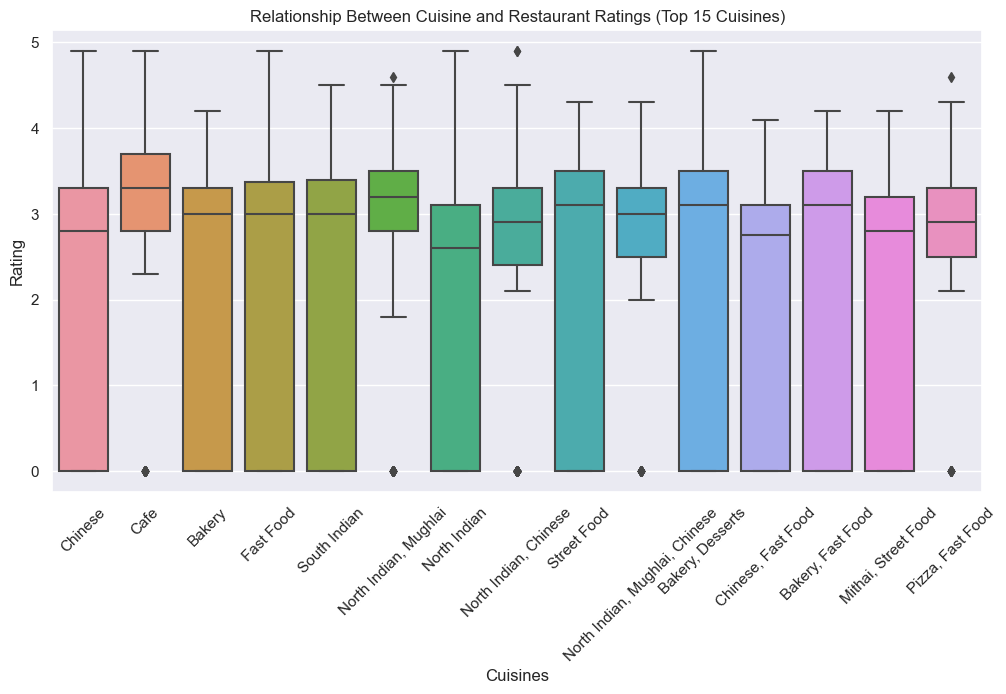

In [19]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cuisines, x='Cuisines', y='Aggregate rating')
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top 15 Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()
     

<b>2. Identify the most popular cuisines among customers based on the number of votes.<b>

In [20]:
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

In [21]:
print("Top 10 Most Popular Cuisines by Number of Votes:")
print(top_cuisines)
     

Top 10 Most Popular Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


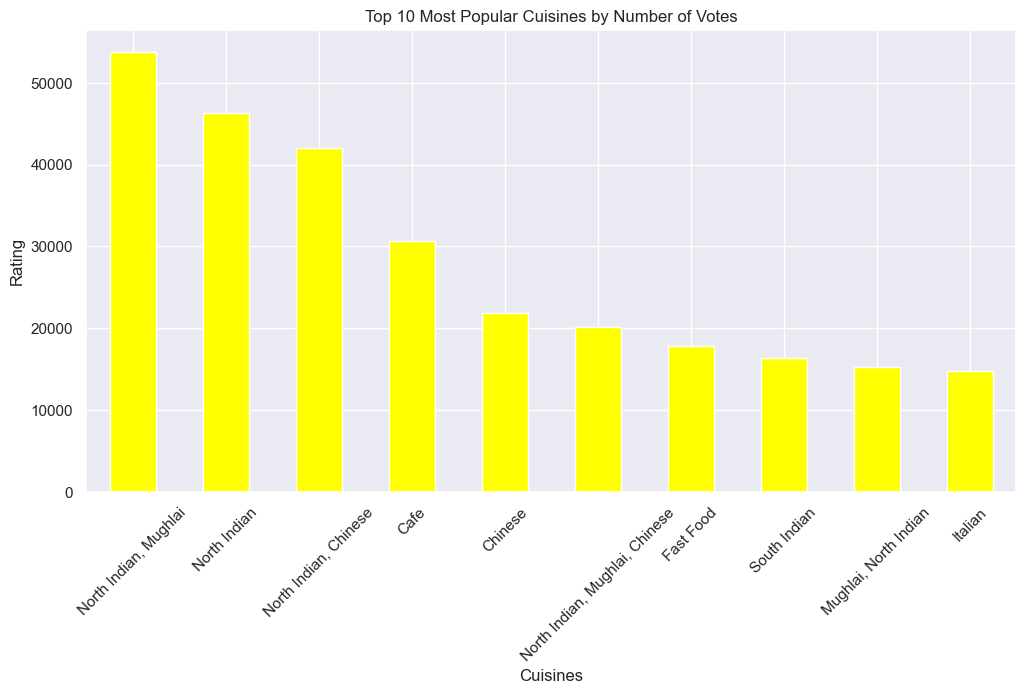

In [22]:
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind ='bar',color ='yellow')

plt.title(f'Top 10 Most Popular Cuisines by Number of Votes')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

plt.xticks(rotation=45)

plt.show()

<b> 3.Discovered specific cuisines that tend to receive higher ratings<b>

In [23]:
#calculate the average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()

In [24]:
# SORT CUISINES BASED ON THE AVERAGE RATINGS IN DESCENDING ORDER 
top_cuisine_ratings = cuisine_ratings.sort_values(ascending = False)

In [25]:
print("Top 10 cuisines with Highest average ratings:")
print(top_cuisine_ratings.head(10))

Top 10 cuisines with Highest average ratings:
Cuisines
Continental, Indian                4.9
Hawaiian, Seafood                  4.9
American, Burger, Grill            4.9
European, Asian, Indian            4.9
European, Contemporary             4.9
American, Coffee and Tea           4.9
American, Sandwich, Tea            4.9
European, German                   4.9
Mexican, American, Healthy Food    4.9
Burger, Bar Food, Steak            4.9
Name: Aggregate rating, dtype: float64


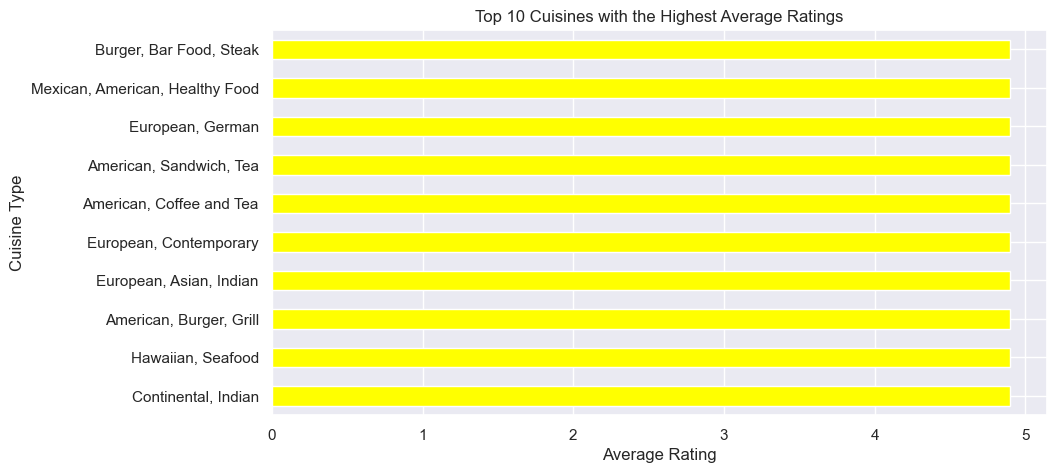

In [26]:
plt.figure(figsize=(10, 5))
top_cuisine_ratings.head(10).plot(kind ='barh',color ='yellow')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.show()

# Results From task 2

<ul>
    <li>Restaurants specializing in café, Mughlai, North Indian, and fast food cuisines can either excel or falter significantly in terms of their ratings.</li>
    <li>North indian and Chinese cuisines are most popular cuisines with highest votes.</li>
    <li>Cafe and Fast food cuisines are with consistent ratings.</li>
    <li>Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.</li>
</ul>

# Level 3 - Task 3

# Task3 :Data Visualization

<b> 1.Created visualizations representing rating distributions using varios chart types.<b>

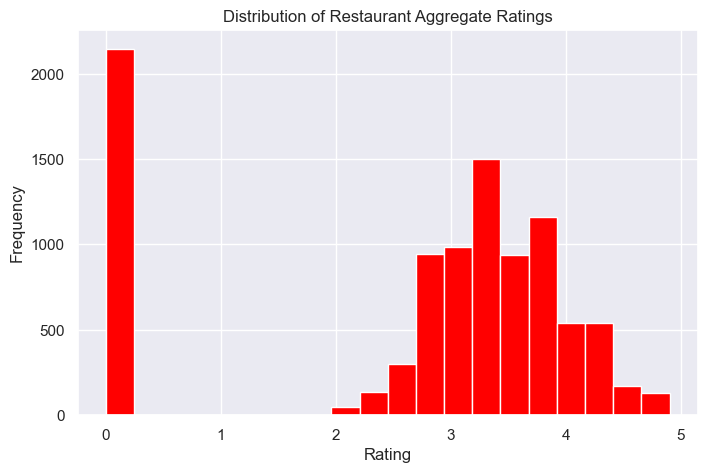

In [27]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=20, color='red')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Aggregate Ratings')
plt.show()

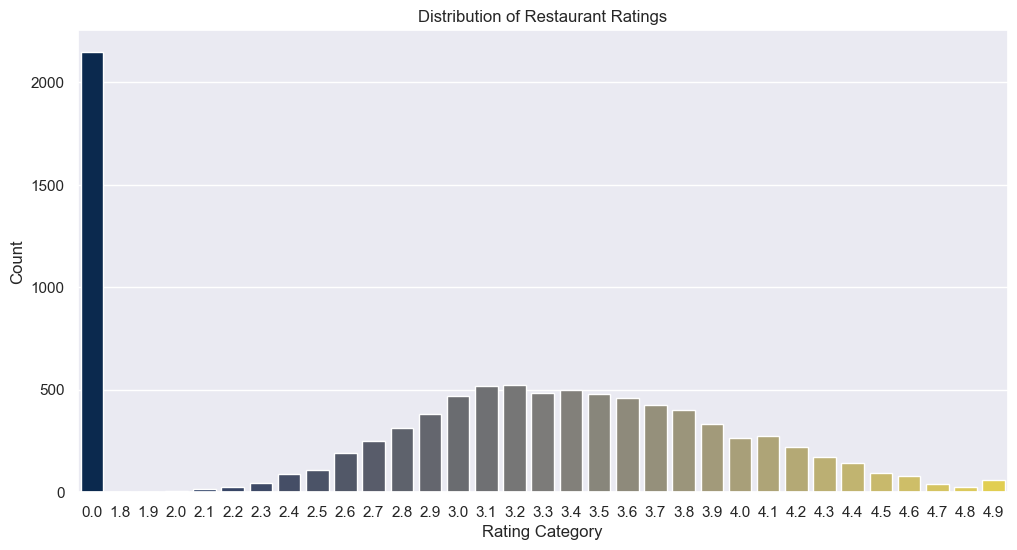

In [28]:
# Create a bar plot
plt.figure(figsize=(12,6))
sns.countplot(x = 'Aggregate rating', data = df, palette= 'cividis')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

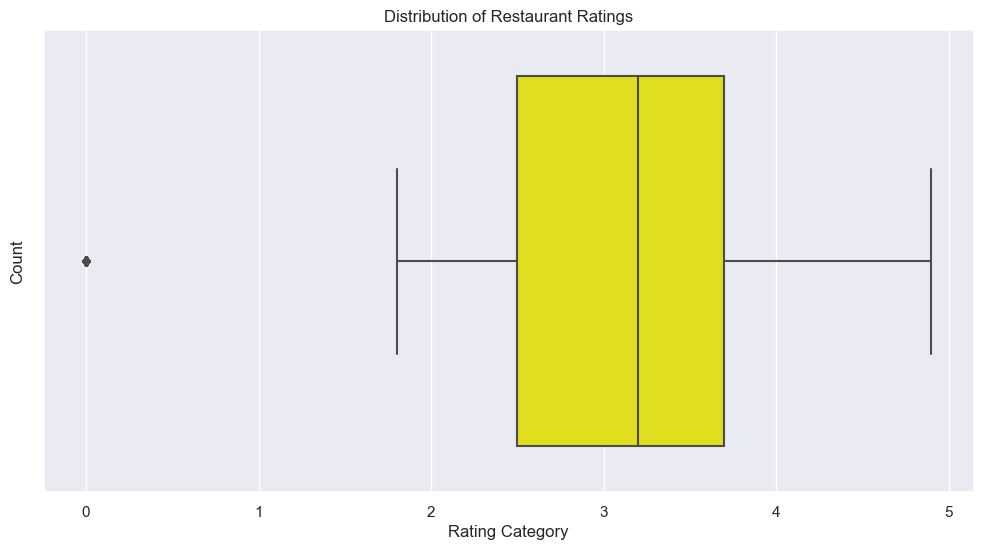

In [29]:
# Create a box plot
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Aggregate rating', data = df, color = 'yellow')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

<b> 2.Compared average ratings across different cuisines and cities.<b>

<b>Comparing Average Ratings for Different Cities <b>

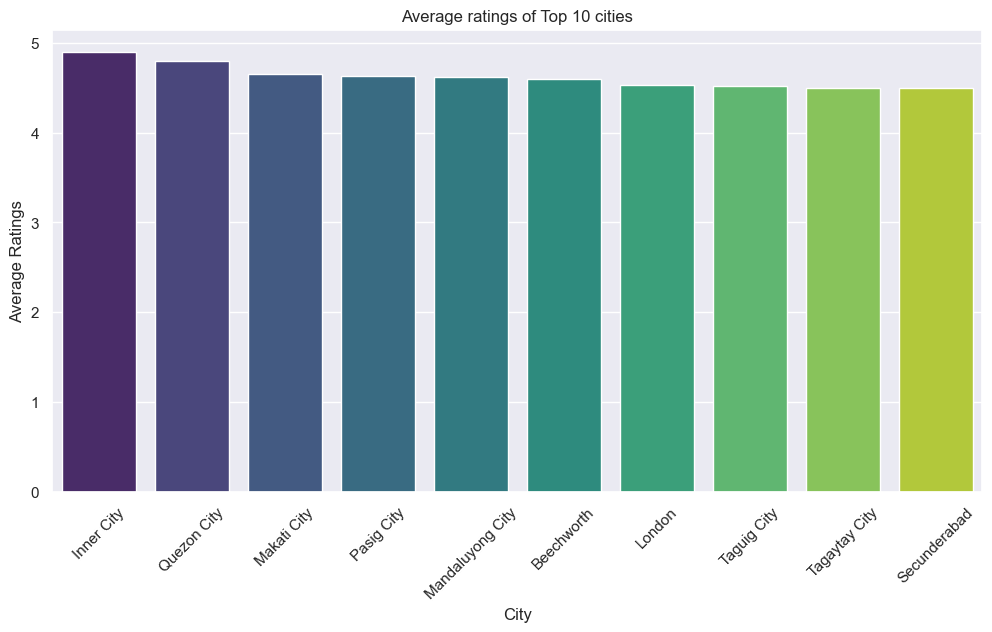

In [30]:
city_ratings = df.groupby('City')['Aggregate rating'].mean()
top_city_ratings = city_ratings.sort_values(ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x = top_city_ratings.head(10).index, y= top_city_ratings.head(10).values,palette ='viridis')
plt.xlabel('City')
plt.ylabel('Average Ratings')
plt.title('Average ratings of Top 10 cities')
plt.xticks(rotation = 45)
plt.show()

<b> Comparing Average Ratings for Different Cuisines <b>

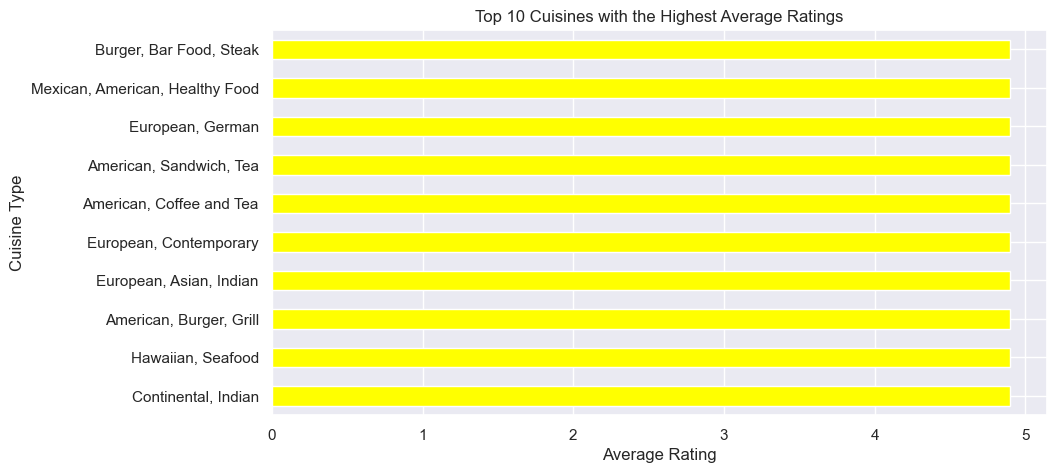

In [31]:
plt.figure(figsize=(10, 5))
top_cuisine_ratings.head(10).plot(kind ='barh',color ='yellow')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.show()

<b> 3. Visualize the relationship between features and the target variable for deeper insights.<b>

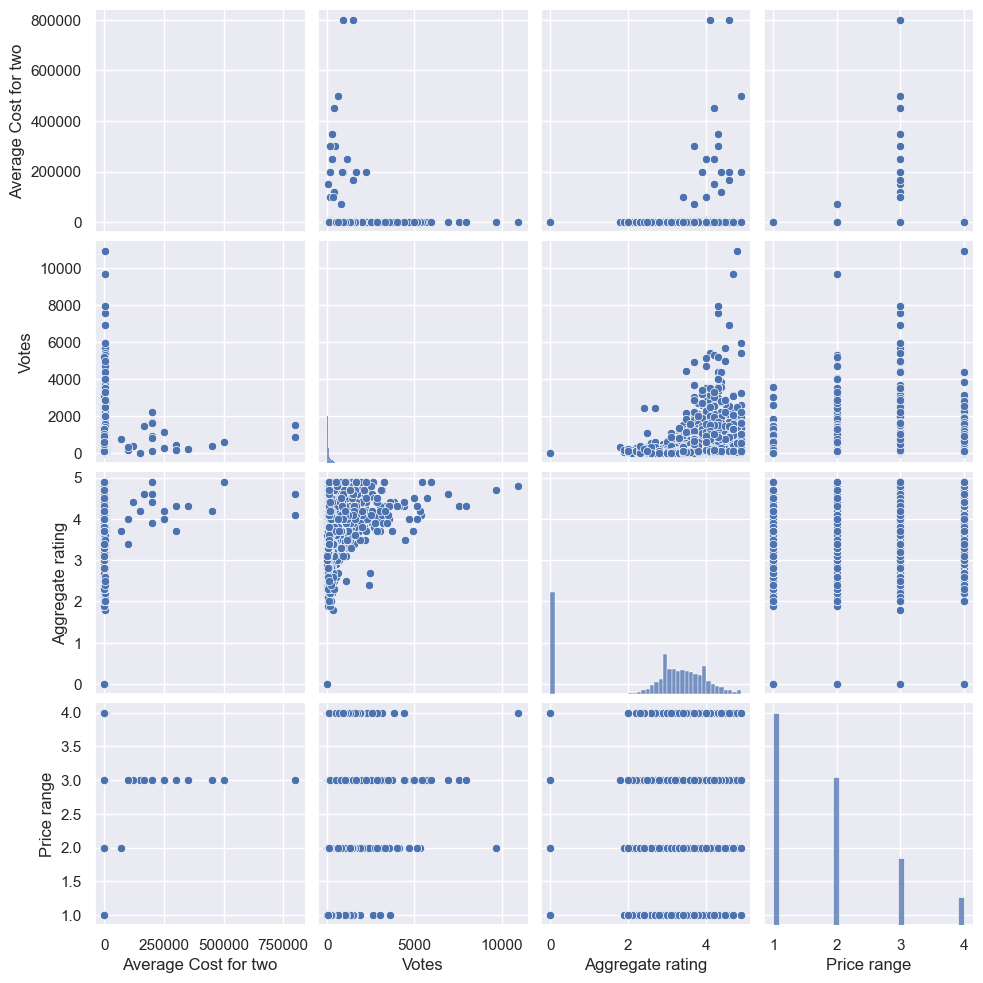

In [32]:
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating','Price range'])
plt.show()

# Results From task 3

<ul> 
    <li> Distribution of Restaurant taings is negatively skewed. </li>
    <li> Most Popular cities by Average ratings are Inner city , Quezon city, Makati city</li>
    <li>Votes and restaurants ratings are positively correlated.</li>
</ul>


# Conclusion

<b> Task 1 :Predictive Modeling <b>

<ul>
    <li>Used three regression models—Linear Regression, Decision Tree, and Random Forest—to predict restaurant aggregate ratings based on the available features.</li>
    <li>For this Dataset, suitable model will be Random Forest which achieved the best results, with the lowest MSE of approximately 0.1331 and the highest R-squared value of about 0.9414.</li>
</ul>

<b> Task2 :Customer Preference Analysis <b>

<ul>
    <li>The cuisines that received the highest average ratings were Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian.</li>
    <li>North Indian and Chinese cuisines show greater variability in their ratings, whereas cafe and fast food cuisines tend to have more consistent ratings.</li>
    <li>Restaurants specializing in café, Mughlai, North Indian, and fast food cuisines can either excel or falter significantly in terms of their ratings.</li>
</ul>

<b> Task3 :Data Visualization <b>

<ul>
    <li>Distribution of Restaurant taings is negatively skewed.</li>
    <li>A positive correlation was observed between the number of votes and restaurant ratings.</li>
</ul>